**Importing libraries**

In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
import random
import os
import matplotlib.pyplot as plt
import splitfolders

print("Libraries imported")
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Libraries imported
Found GPU at: /device:GPU:0


**Checking which classes I need to use**

In [ ]:
labels = {
  'containers': [ 'food_tray', 'glass_container', 'serving_tray', 'disposable_container', 'plastic_tray', 'grocery_bag', 'decorative_tray', 'reusable_bag', 'plastic_bag', 'paper_bag', 'food_banister', 'basket_container', 'glass_tray', 'colored_paper_bag', 'plastic_food_container', 'glass_food_container', 'plastic_container',  ],
  'tableware': [ 'pasta_bowl', 'teacup', 'snack_bowl', 'espresso_cup', 'accent_plate', 'beer_glasses', 'cereal_bowl', 'water_glasses', 'dessert_plate', 'soup_bowl', 'side_dish_plate', 'rice_bowl', 'salad_plate', 'salad_bowl', 'buillin_cup', 'fruit_plate', 'saucer_cup', 'coffee_mug', 'dessert_bowl', 'coffee_cup', 'dinner_plate', 'sushi_plate', 'wine_glasses',  ],
  'drinks': [ 'Cocoa_drink_bottle', 'juice_carton', 'Coffee_drink_bottle', 'Flavored_Water', 'Tonic_Water', 'Tea_drink_bottle', 'Sparkling_Water', 'Juice_bottle', 'Seltzer_Water', 'Mineral_Water', 'Sports_Drinking_Water', 'juice_box', 'Soft_Drink_can', 'iced_tea', 'Energy_Drink', 'chocolate_drink_bottle', 'soft_drink_bottle',  ],
  'cutlery': [ 'Knives', 'chopsticks', 'plastic_fork', 'carving_knife_fork', 'Forks', 'utensils', 'cake_server', 'butter_knives', 'plastic_spoon', 'dinnerware', 'plastic_knife', 'Sporks', 'steak_knives', 'Spoons', 'serveware',  ],
  'fruits': [ 'Bananas', 'Oranges', 'Cranberries', 'Nectarines', 'Plums', 'Grapes', 'Grapefruit', 'Papayas', 'Peaches', 'Raspberries', 'Strawberries', 'Pears', 'Pineapple', 'Lemons', 'Blueberries', 'Tangerines', 'Mangos', 'Figs', 'Cherries', 'Melons', 'Apricots', 'Mixed', 'Apples',  ],
  'snacks': [ 'Mints_bag', 'Fruit_Snacks', 'Vegetable_Chips_&_Crisps', 'Marshmallows_bag', 'bubble_gum_brand', 'Cookies', 'Sour_Candy_bag', 'Hard_Candy_snacks', 'potato_Crisps', 'Candy_Bars', 'snacks_Seeds', 'Pretzels', 'Chewing_Gum_brand', 'Jelly_Beans_bag', 'potato_chips_pringles', 'Assorted_Snack_Cookies', 'Lollipops', 'Breadsticks', 'Gummy_Candy_bag', 'Potato_Chips_bag', 'Fruit_Cups', 'Puffed_Snacks', 'Nuts_snacks', 'Crackers', 'Party_Mix_snack', 'Popcorn',  ],
  'food': [ 'Olives_jar', 'pasta_sides', 'rice_sides', 'jarred_vegetables', 'Muesli_box', 'instant_ramen_noodles', 'canned_sardines', 'pickled_vegetables', 'Packaged_Bread', 'Oatmeal_box', 'noodle_soup_cup', 'Fruit_Butters', 'canned_tuna', 'Jams', 'Nut_&_Seed_Butter', 'Honey', 'canned_vegetables', 'Marmalades', 'Cereals_box', 'canned_soup', 'instant_Soup', 'Macaroni_&_Cheese_box',  ],
  'cleaning_stuff': [ 'Paper_Towels', 'Floor_Cleaners', 'Carpet_Cleaners', 'Sponges', 'Glass_Cleaners', 'Furniture_&_Wood_Polishes', 'Metal_Polishes', 'Broom_Handles_&_Heads', 'Latex_Gloves', 'Hand_Brooms', 'Push_Brooms', 'Caddies', 'All-Purpose_Cleaners', 'Wet_Mops', 'Brushes', 'Cloths_&_Wipes', 'Mop_Handles', 'Bathroom_Cleaners', 'Carpet_Spot_Cleaning_Sprays', 'Angle_Brooms', 'Mop_Heads_&_Sponges', 'Dust_Cloths', 'Drain_Openers', 'Dust_Mops_&_Pads', 'Carpet_Stain_Precleaners', 'Carpet_Machine_Detergents', 'Carpet_Deodorizers', 'Vinyl_Gloves', 'Upholstery_Cleaners', 'Refill_Sponges', 'Feather_Dusters', 'Squeegees', 'Buckets', 'Nitrile_Gloves', 'Dustpans', 'Replacement_Heads', 'Kitchen_Cleaners',  ]
}

# Put your matricola number here (replacing ERROR)
matricola = 1957976

random.seed(matricola)

for k in labels.keys():
  #print(labels[k])
  tl = random.choice(list(labels[k]))
  print("%s/%s" %(k,tl))


containers/grocery_bag
tableware/side_dish_plate
drinks/Tea_drink_bottle
cutlery/dinnerware
fruits/Melons
snacks/Breadsticks
food/canned_tuna
cleaning_stuff/Mop_Handles


**Mounting drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Splitting Dataset**
I split the dataset using the splitfolders function. This function produces in output 3 subsets of the dataset:


*   70% of the dataset is the Training Set
*   10% of the dataset is the Testing Set (used to check performances at the end)
*   20% of the dataset is the Validation Set (used during training)



In [ ]:
splitfolders.ratio('/content/drive/MyDrive/ML_HW2', output='/content/drive/MyDrive/Data', seed=1234, ratio=(.7, .1, .2)) 

Copying files: 8588 files [00:53, 159.54 files/s]


**We make random transformations in order to increase variability**

In [ ]:
datadir = '/content/drive/MyDrive/Data'
trainingset = datadir+'/train/'
valset = datadir + '/val/'

batch_size=32
train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.1, rotation_range = 5,
                                   width_shift_range = 0.1, height_shift_range = 0.1,
                                   horizontal_flip = True, vertical_flip = False)

train_generator = train_datagen.flow_from_directory(directory = trainingset, target_size=(256, 256), color_mode='rgb',
                                                    batch_size=batch_size, class_mode='categorical', shuffle=True)

val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator = val_datagen.flow_from_directory(directory = valset, target_size=(256, 256), color_mode="rgb",
                                                  batch_size=batch_size, class_mode="categorical", shuffle=False)

num_samples = train_generator.n
num_classes = train_generator.num_classes
input_shape = train_generator.image_shape
classnames = [k for k,v in train_generator.class_indices.items()]

print("Image input %s" %str(input_shape))
print("Classes: %r" %classnames)

print('Loaded %d training samples from %d classes.' %(num_samples,num_classes))
print('Loaded %d test samples from %d classes.' %(val_generator.n,val_generator.num_classes))

Found 6007 images belonging to 8 classes.
Found 1726 images belonging to 8 classes.
Image input (256, 256, 3)
Classes: ['Breadsticks', 'Melons', 'Mop_Handles', 'Tea_drink_bottle', 'canned_tuna', 'dinnerware', 'grocery_bag', 'side_dish_plate']
Loaded 6007 training samples from 8 classes.
Loaded 1726 test samples from 8 classes.


**Defining the Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import regularizers
from keras import optimizers

def NeuralNetwork(input_shape, num_classes, regl2 = 0.0001, lr=0.0001):
  
  model = Sequential()

  #CL1
  model.add(Conv2D(filters=96, input_shape=input_shape, kernel_size=(7,7), strides=(2,2), padding = 'valid'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding = 'valid'))
  model.add(BatchNormalization())

  #CL2
  model.add(Conv2D(filters=128, kernel_size=(7,7), strides=(2,2), padding = 'valid'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding = 'valid'))
  model.add(BatchNormalization())

  #CL3
  model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(2,2), padding = 'valid'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding = 'valid'))
  model.add(BatchNormalization())

  model.add(Flatten())

  flatten_shape = (input_shape[0]*input_shape[1]*input_shape[2],)

  #DL1
  model.add(Dense(4096, input_shape=flatten_shape, kernel_regularizer=regularizers.l2(regl2)))
  model.add(Activation('relu'))
  model.add(Dropout(0.4))
  model.add(BatchNormalization())

  #DL2
  model.add(Dense(1000, kernel_regularizer=regularizers.l2(regl2)))
  model.add(Activation('relu'))
  model.add(Dropout(0.4))
  model.add(BatchNormalization())

  #Output
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  adam=optimizers.Adam(lr=lr)
  model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

  return model

**Summary of the Network**

In [ ]:
model = NeuralNetwork(input_shape, num_classes)
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 125, 125, 96)      14208     
_________________________________________________________________
activation_56 (Activation)   (None, 125, 125, 96)      0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 62, 62, 96)        0         
_________________________________________________________________
batch_normalization_47 (Batc (None, 62, 62, 96)        384       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 28, 28, 128)       602240    
_________________________________________________________________
activation_57 (Activation)   (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 14, 14, 128)     

**Model training**

In [ ]:
steps_per_epoch=train_generator.n//train_generator.batch_size
val_steps=val_generator.n//val_generator.batch_size+1
epochs = 50
try:
    model_history = model.fit(train_generator, epochs=epochs, verbose=1, steps_per_epoch = steps_per_epoch, 
                        validation_data=val_generator, validation_steps=val_steps)
except KeyboardInterrupt:
    pass

Epoch 1/50
187/187 [==============================] - 99s 529ms/step - loss: 2.5345 - accuracy: 0.3401 - val_loss: 2.7271 - val_accuracy: 0.1767
Epoch 2/50
187/187 [==============================] - 95s 510ms/step - loss: 2.3052 - accuracy: 0.3956 - val_loss: 2.4823 - val_accuracy: 0.2874
Epoch 3/50
187/187 [==============================] - 96s 511ms/step - loss: 2.1349 - accuracy: 0.4420 - val_loss: 1.9842 - val_accuracy: 0.4397
Epoch 4/50
187/187 [==============================] - 96s 512ms/step - loss: 2.0554 - accuracy: 0.4686 - val_loss: 1.7800 - val_accuracy: 0.5313
Epoch 5/50
187/187 [==============================] - 95s 506ms/step - loss: 1.9966 - accuracy: 0.4808 - val_loss: 2.3619 - val_accuracy: 0.4125
Epoch 6/50
187/187 [==============================] - 93s 497ms/step - loss: 1.9060 - accuracy: 0.5125 - val_loss: 1.8749 - val_accuracy: 0.5295
Epoch 7/50
187/187 [==============================] - 92s 493ms/step - loss: 1.8322 - accuracy: 0.5285 - val_loss: 3.1264 - val_ac

**Accuracy and loss over training epochs**

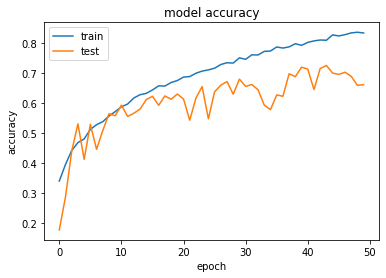

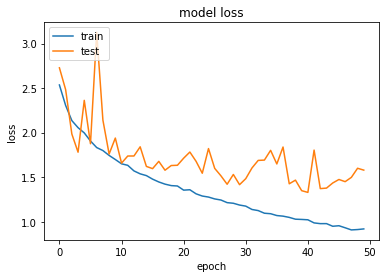

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Saving the model**

In [ ]:
models_dir = datadir

def savemodel(model, problem):
    filename = os.path.join(models_dir, '%s.h5' %problem)
    model.save(filename)
    print("\nModel saved successfully on file %s\n" %filename)

savemodel(model,'My_NN_model')


Model saved successfully on file /content/drive/MyDrive/Data/My_NN_model.h5



**Loading the presaved model**
Not necessary in this case, but it's always good to have a loading function

In [ ]:
from keras.models import load_model

models_dir = datadir

def loadmodel(problem):
    filename = os.path.join(models_dir, '%s.h5' %problem)
    try:
        model = load_model(filename)
        print("\nModel loaded successfully from file %s\n" %filename)
    except OSError:    
        print("\nModel file %s not found!!!\n" %filename)
        model = None
    return model

model = loadmodel('My_NN_model')

**Now, we evaluate the model**

In [ ]:
testset = datadir + '/test/'

test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
    directory=testset,
    target_size=(256, 256),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

val_steps=test_generator.n//test_generator.batch_size+1
loss, acc = model.evaluate(test_generator,verbose=1,steps=val_steps)
print('Test loss: %f' %loss)
print('Test accuracy: %f' %acc)

Found 855 images belonging to 8 classes.
27/27 [==============================] - 2s 89ms/step - loss: 1.6162 - accuracy: 0.6573
Test loss: 1.616195
Test accuracy: 0.657310


In [ ]:
import sklearn.metrics 
from sklearn.metrics import classification_report, confusion_matrix

preds = model.predict(test_generator,verbose=1,steps=val_steps)

Ypred = np.argmax(preds, axis=1)
Ytest = test_generator.classes  

print(classification_report(Ytest, Ypred, labels=None, target_names=classnames, digits=3))

27/27 [==============================] - 2s 89ms/step
                  precision    recall  f1-score   support

     Breadsticks      0.693     0.760     0.725       104
          Melons      0.814     0.625     0.707       112
     Mop_Handles      0.914     0.655     0.763       113
Tea_drink_bottle      0.555     0.717     0.626        99
     canned_tuna      0.473     0.821     0.600        95
      dinnerware      0.671     0.579     0.621        95
     grocery_bag      0.737     0.670     0.702       109
 side_dish_plate      0.620     0.484     0.544       128

        accuracy                          0.657       855
       macro avg      0.685     0.664     0.661       855
    weighted avg      0.690     0.657     0.661       855



**A function for Confusion Matrix**

In [ ]:
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  
    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

**Confusion Matrix**

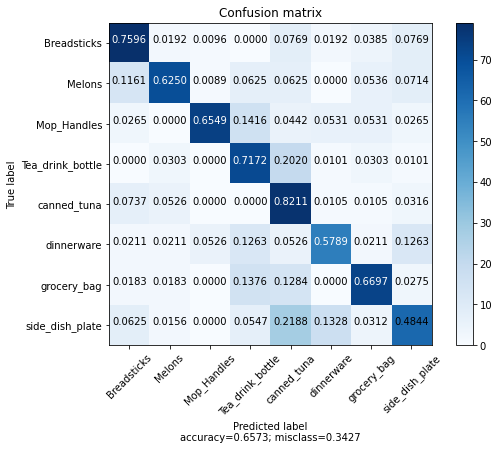

In [ ]:
cm = confusion_matrix(Ytest, Ypred, labels=None, sample_weight=None)
plot_confusion_matrix(cm, classnames)